In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df=pd.read_csv('hotel_booking.csv')
df.head()
#dataset is about bookings of hotel, has about 32 main columns, and 4 columns with additional info. Target value is "is_canceled"

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.shape
#initial shape of dataset

(119390, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.drop(columns=['name','email','phone-number','credit_card','reservation_status_date'],inplace=True)
#we delete unnecessary columns

In [7]:
df.isna().sum()
#it shows number of null values in each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(columns=['company'],inplace=True)
# may delete column company, because majority of data is NaN

In [9]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


<BarContainer object of 2 artists>

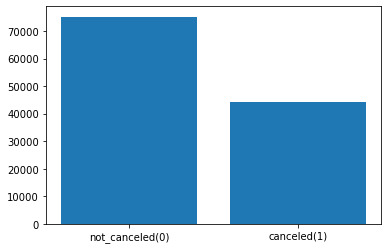

In [10]:
plt.bar(['not_canceled(0)','canceled(1)'], df['is_canceled'].value_counts())
#bar chart, shows not canceled and canceled booking numbers, slightly imbalanced dataset, can do undersampling

In [11]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [12]:
undersampling1 = df[df['is_canceled']==0].sample(n=len(df[df['is_canceled']==1]), random_state=101)
undersampling2 = df[df['is_canceled']==1]
new_df = pd.concat([undersampling1,undersampling2])
new_df
#new_df is now undersampled, balanced dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
32662,Resort Hotel,0,0,2017,January,5,31,0,1,1,...,D,0,No Deposit,314.0,0,Transient,34.4,0,0,Check-Out
77881,City Hotel,0,16,2015,September,39,25,2,3,1,...,D,2,No Deposit,1.0,0,Transient-Party,170.0,0,0,Check-Out
41546,City Hotel,0,0,2015,August,34,18,0,1,2,...,A,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out
108887,City Hotel,0,99,2017,March,13,31,1,2,2,...,A,0,No Deposit,9.0,0,Transient,110.4,0,2,Check-Out
1777,Resort Hotel,0,156,2015,September,38,14,1,1,1,...,G,0,No Deposit,240.0,0,Transient,58.5,1,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,9.0,0,Transient,0.0,0,3,Canceled
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,NaN,0,Transient,65.0,0,0,Canceled
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,0,No Deposit,NaN,0,Transient,65.0,0,0,Canceled
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,D,0,No Deposit,NaN,0,Transient,65.0,0,0,No-Show


<BarContainer object of 2 artists>

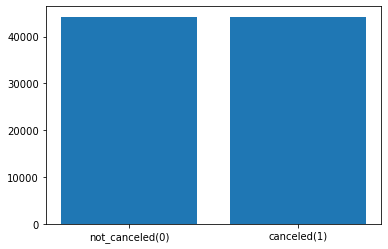

In [13]:
plt.bar(['not_canceled(0)','canceled(1)'], new_df['is_canceled'].value_counts())
#not its balanced

C:\Users\Ali\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='agent', ylabel='Density'>

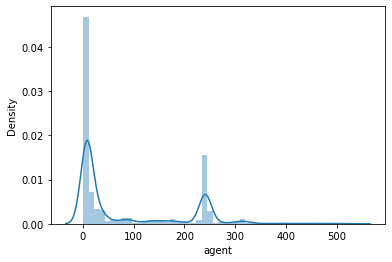

In [14]:
sns.distplot(new_df['agent'])
#can fill nan values of column agent with mean of entire agent feature

In [15]:
new_df["agent"].fillna(np.mean(df["agent"]), inplace = True)#
#agent column has no nan values now

In [16]:
new_df.dropna(inplace=True)
#can drop all nan values, we wont lose much data after filling

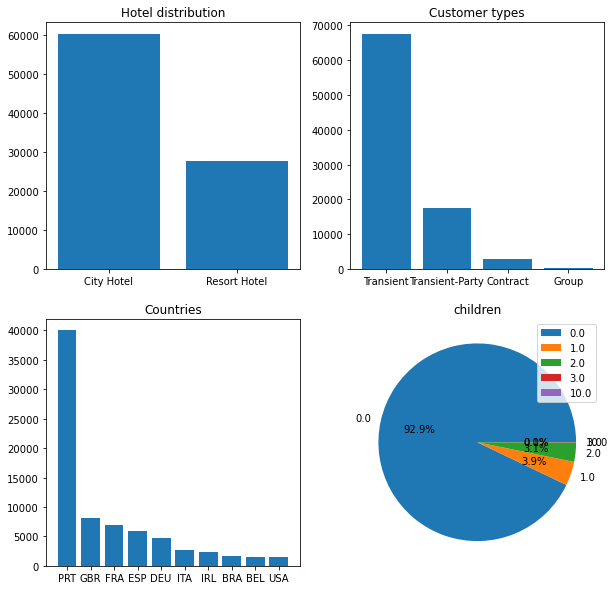

In [17]:
figure, axis = plt.subplots(2, 2,figsize=(10,10))
  

axis[0, 0].bar(new_df['hotel'].value_counts().index,new_df['hotel'].value_counts())
axis[0, 0].set_title("Hotel distribution")
  

axis[0, 1].bar(new_df['customer_type'].value_counts().index, new_df['customer_type'].value_counts())
axis[0, 1].set_title("Customer types")
  

axis[1, 0].bar(new_df['country'].value_counts()[:10].index, new_df['country'].value_counts()[:10])
axis[1, 0].set_title("Countries")
  

axis[1, 1].pie(new_df['children'].value_counts(),labels = new_df['children'].value_counts().index,autopct='%1.1f%%')
axis[1, 1].set_title("children")
plt.legend(new_df['children'].value_counts().index)
  


plt.show()
#graphs to see the distribution of values of features

In [18]:
new_df.drop(columns=['country'],inplace=True)
#dropped column country, that has more than 100 unique values, will not help in transforming

In [19]:
month_to_day = {
    'August':8,
    'July':7,
    'May':5,
    'April':4,
    'June':6,
    'October':10,
    'September':9,
    'March':3,
    'February':2,
    'December':12,
    'November':11,
    'January':1
}
months = new_df['arrival_date_month'].apply(lambda x: month_to_day[x])
new_df['months_num'] = months
new_df.drop(columns=['arrival_date_month'],inplace=True)
#create dictionary with month to change to numerical value, and transform column

In [20]:
ohe_cols = []
for col in new_df.columns:
    if new_df[col].dtype=='object' and col!='is_canceled':
        ohe_cols.append(col)
#collecting columns that I use for transforming onehotencode

In [21]:

transformer = make_column_transformer(
    (OneHotEncoder(),ohe_cols),
    remainder='passthrough'
)
transformed = transformer.fit_transform(new_df)
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names()
)
#finally, we have transformed_df, for prediction

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
transformed_df

,onehotencoder__x0_City Hotel,onehotencoder__x0_Resort Hotel,onehotencoder__x1_BB,onehotencoder__x1_FB,onehotencoder__x1_HB,onehotencoder__x1_SC,onehotencoder__x1_Undefined,onehotencoder__x2_Aviation,onehotencoder__x2_Complementary,onehotencoder__x2_Corporate,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,months_num
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,314.000000,0.0,34.4,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.000000,0.0,170.0,0.0,0.0,9.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.693382,0.0,75.0,0.0,0.0,8.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.000000,0.0,110.4,0.0,2.0,3.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,240.000000,0.0,58.5,1.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88132,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.000000,0.0,0.0,0.0,3.0,4.0
88133,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,86.693382,0.0,65.0,0.0,0.0,6.0
88134,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,86.693382,0.0,65.0,0.0,0.0,5.0
88135,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,86.693382,0.0,65.0,0.0,0.0,7.0


In [23]:
X=transformed_df.drop(columns='is_canceled')
y=transformed_df['is_canceled']

In [24]:
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2)
#splitting dataset into train test

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#fitting data

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:

print(accuracy_score(y_test, logreg.predict(X_test)),'accuracy')


0.9900726117540277 accuracy


In [27]:

print(recall_score(y_test, logreg.predict(X_test)),'recall')

0.9855780149897797 recall


In [28]:


print(precision_score(y_test, logreg.predict(X_test)),'precision')

0.9944998281196288 precision


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
cm = confusion_matrix(y_test, logreg.predict(X_test))

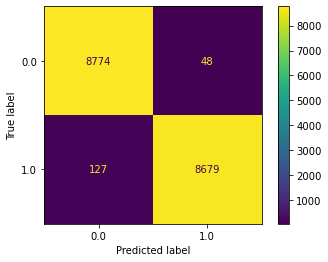

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
(tn, fp, fn, tp)

(8774, 48, 127, 8679)